[ 0.33333333  0.33333333  0.          0.          0.          0.          0.
  0.          0.33333333  0.        ] [ 0.26666667  0.06666667  0.3         0.3         0.03333333  0.          0.
  0.          0.          0.03333333]


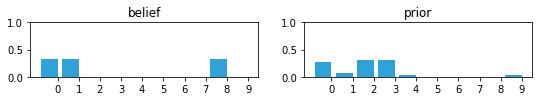

In [33]:
#matplotlib inline
import numpy as np
from kf_book.book_plots import figsize, set_figsize
import kf_book.book_plots as book_plots
import matplotlib.pyplot as plt
from filterpy.discrete_bayes import normalize

def predict_move(belief,move,p_under,p_correct,p_over):
    n=len(belief)
    prior = np.zeros(n)
    for i in range(n):
        prior[i] = (
            belief[(i-move) % n] * p_correct +
            belief[(i-move-1) % n] * p_over +
            belief[(i-move+1) % n] * p_under)
    return prior

belief = normalize([1,1,0,0,0,0,0,0,1,0])
#belief = normalize(np.abs(np.random.randn(10)))
prior = predict_move(belief, 2, .1, .8, .1)
book_plots.plot_belief_vs_prior(belief,prior)
set_figsize(y=1)
print(belief,prior)


[1 0 1 0 0 1 0 1 0 0]


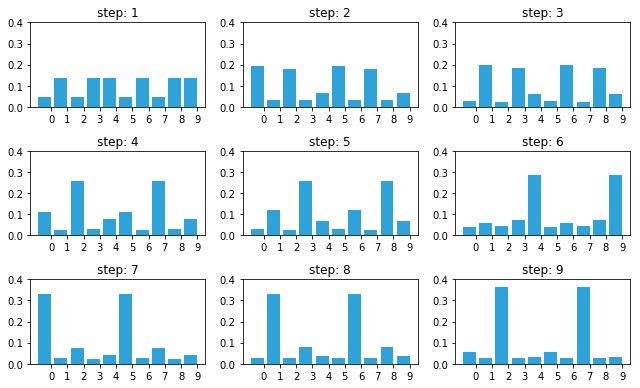

In [48]:
from filterpy.discrete_bayes import update, predict, normalize
import numpy as np
import kf_book.book_plots as book_plots
from kf_book.book_plots import figsize, set_figsize
import matplotlib.pyplot as plt

def lh_hallway(hall,z,z_prob):
    """ compute likelihood that a measurement matches
    positions in the hallway."""
    try:
        scale = z_prob / (1. - z_prob)
    except ZeroDivisionError:
        scale = 1e8
        
    likelihood = np.ones(len(hall))
    likelihood[hall == z] *= scale
    return likelihood

%matplotlib inline
with figsize(y=5.5):
    hallway = np.asarray([1, 0, 1, 0, 0]*2)
    prior = np.asarray([.1]*10)
    offset = 1
    kernel = np.asarray([.1, .8, .1])
    measurement = [0, 1, 0, 1, 0, 0, 1, 0, 1]
    for i, m in enumerate(measurement):
        likelihood = lh_hallway(hallway, z=m, z_prob=0.75)
        posterior = update(likelihood,prior)
        prior = predict(posterior, offset, kernel)
        plt.subplot(3,3,i+1)
        book_plots.bar_plot(posterior,ylim=(0,.4),title='step: {}'.format(i+1))
    plt.tight_layout() #区别在于，可以让个子图彼此分离，不至于title和图片重叠
print(hallway)

这一章主要基于贝叶斯条件概率理论和全概率理论建立的Discrete_Bayes Filter。

其中重要的三个函数分别为：
``` python
from filterpy.discrete_bayes import update, predict

likelihood = lh_hallway(hallway, z, z_prob);  #P(Z \mid x_i)
posterior = undate(likelihood,prior);  #P(x_i \mid Z)
prior = predict(posterior, move_distance, kernel); # P(x_i)
```

Bayes theorem is

$$P(x_i \mid Z) = \frac{P(Z \mid x_i) P(x_i)}{P(Z)}$$

即：

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$ 

Total Probability Theorem is

$$P(X_i^t) = \sum_j P(X_j^{t-1})  P(x_i | x_j)$$







